<a href="https://colab.research.google.com/github/muzammil-max/ML-and-DL-Journey/blob/main/wine_quality_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Predictor

Dataset is imbalanced but the model is accurate

In this project the model learns on the patterns and chemistry of Wine and predict its quality.

In [28]:
!pip install tensorflow==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully unin

In [48]:
!pip install imblearn

In [1]:
import tensorflow as tf
import pandas as pd


In [72]:
CSV_COLUMNS_NAMES = ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol","quality"]
CLASSES = ["Low Quality","High Quality"]

wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';', names=CSV_COLUMNS_NAMES, header=0)

wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


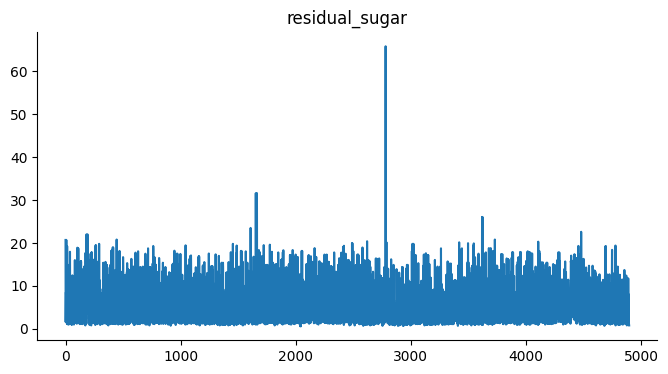

In [68]:
# @title residual_sugar

from matplotlib import pyplot as plt
wine_data['residual_sugar'].plot(kind='line', figsize=(8, 4), title='residual_sugar')
plt.gca().spines[['top', 'right']].set_visible(False)

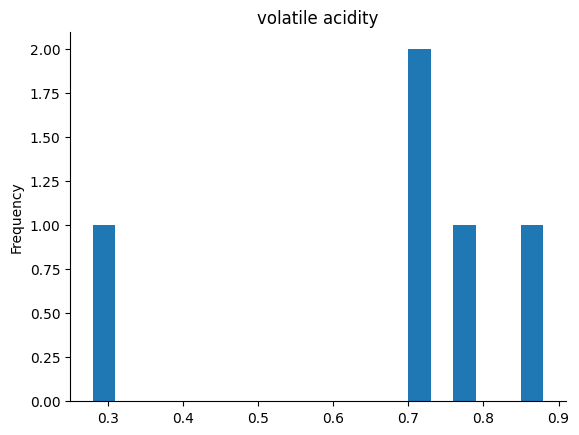

In [7]:
from matplotlib import pyplot as plt
_df_1['volatile acidity'].plot(kind='hist', bins=20, title='volatile acidity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [69]:
train = wine_data.sample(frac=0.8, random_state=1) #no test data so we randomly pick some values from train data and it will have 20% of train data 👅👅👅
test = wine_data.drop(train.index)

In [70]:
#Time to create model and train using Deep Neural Networks
#run this cell one time only otherwise it will give error
#FIX: run the above cell again to repopulate the arrays

train_y = train.pop('quality')
test_y = test.pop('quality')

In [71]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
train_resampled, train_y_resampled = oversampler.fit_resample(train, train_y)

In [63]:
def input_fn(features,labels,training=True,batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))
    if training:
        dataset = dataset.shuffle(1000).repeat()

    return dataset.batch(batch_size)


#feature columns

feature_columns = []
for key in train.keys():
    feature_columns.append(tf.feature_column.numeric_column(key=key))


#creating a model

classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[50,30],
    n_classes=2,
    optimizer='Adam'
)

import logging
logger = tf.get_logger()
logger.setLevel(logging.INFO)

train_y_resampled_binary = train_y_resampled.apply(lambda x: 1 if x >= 7 else 0)

classifier.train(
    input_fn=lambda: input_fn(train_resampled,train_y_resampled_binary,training=True),
    steps=20000
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpj69ow_4j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:ten

In [65]:
test_y_binary = test_y.apply(lambda x: 1 if x >= 7 else 0)
classifier.evaluate(input_fn=lambda: input_fn(test,test_y_binary,training=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2025-07-26T07:55:41
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpj69ow_4j/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.48979s
INFO:tensorflow:Finished evaluation at 2025-07-26-07:55:41
INFO:tensorflow:Saving dict for global step 20000: accuracy = 0.85625, accuracy_baseline = 0.853125, auc = 0.8594809, auc_precision_recall = 0.531895, average_loss = 0.56378084, global_step = 20000, label/mean = 0.146875, loss = 0.43536404, precision = 0.5074627, prediction/mean = 0.22330499, recall = 0.7234042
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 20000: /tmp/tmpj69ow_4j/model.ckpt-20000


{'accuracy': 0.85625,
 'accuracy_baseline': 0.853125,
 'auc': 0.8594809,
 'auc_precision_recall': 0.531895,
 'average_loss': 0.56378084,
 'label/mean': 0.146875,
 'loss': 0.43536404,
 'precision': 0.5074627,
 'prediction/mean': 0.22330499,
 'recall': 0.7234042,
 'global_step': 20000}

In [66]:
#prediction function

def wine_predict():
  predict = {}
  features = CSV_COLUMNS_NAMES[:-1]
  print("Please typea the wine measurement values")
  for feature in features:
    val = input(feature + ": ")
    predict[feature] = [float(val)]

  predictions = classifier.predict(input_fn = lambda: input_fn(predict,labels=None,training=False))
  for pred_dict in predictions:
     class_id = pred_dict['class_ids'][0]
     probability = pred_dict['probabilities'][class_id]
     print(CLASSES[class_id], 100 * probability)

wine_predict()

Please typea the wine measurement values
fixed_acidity: 5.6
volatile_acidity: 0.54
citric_acid: 0.04
residual_sugar: 1.7
chlorides: 0.049
free_sulfur_dioxide: 5
total_sulfur_dioxide: 13
density: 0.9942
pH: 3.72
sulphates: 0.58
alcohol: 11.4


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpj69ow_4j/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


Low Quality 99.99995231628418


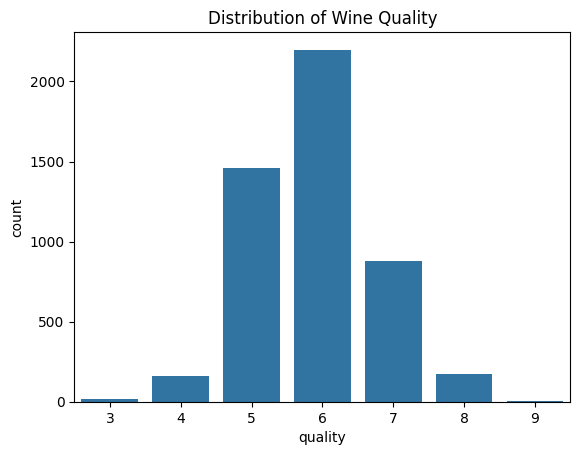

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.show()